#### BAB VIII (STATISTIK DALAM ILMU DATA)

##### MEAN, MEDIAN, DAN MODUS

In [1]:
import pandas as pd
import numpy as np
a = np.array([[1, 2], [3, 4]])
print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

2.5
[2. 3.]
[1.5 3.5]


In [2]:
a = np.array([[10, 7, 4], [3, 2, 1]])
print(np.median(a))
print(np.median(a, axis=0))
print(np.median(a, axis=1))

3.5
[6.5 4.5 2.5]
[7. 2.]


##### Distribusi Poisson

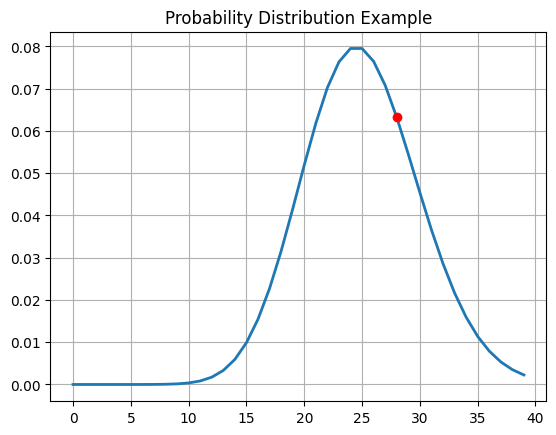

In [3]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

plt.title('Probability Distribution Example')
arr = []
rv = poisson(25)
for num in range(0, 40):
    arr.append(rv.pmf(num))

prob = rv.pmf(28)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([28], [prob], marker='o', markersize=6, color='red')
plt.show()

##### Binomial Distribution

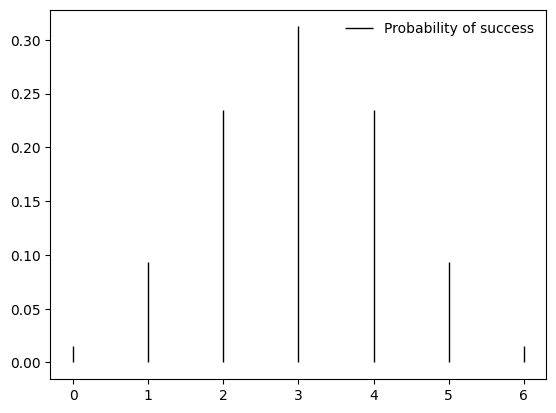

In [4]:
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = range(7)
n, p = 6, 0.5
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), color='k', linestyles='-', lw=1, label='Probability of success')
ax.legend(loc='best', frameon=False)
plt.show()

##### Normal Distribution

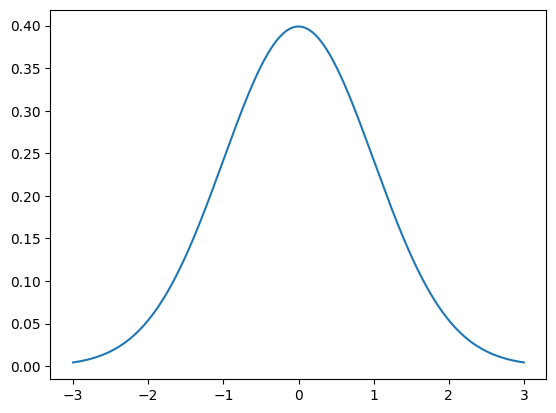

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

jangkauan = np.arange(-3, 3, 0.001)
plt.plot(jangkauan, norm.pdf(jangkauan, 0, 1))
plt.show()

##### Koefisien Korelasi Pearson

In [6]:
from scipy.stats import pearsonr

x = np.array([-0.65499887, 2.34644428, 3.0])
y = np.array([-1.46049758, 3.86537321, 21.0])

r_row, p_value = pearsonr(x, y)
print(r_row)
print(p_value)

0.7961701483197556
0.4137120087370103


##### Fungsi Densitas Probabilitas 

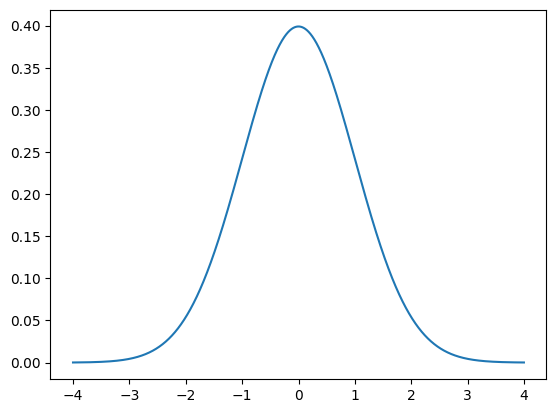

In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.pdf(x))
plt.show()

##### Inferensi Statistik dan Pengujian Hipotesis

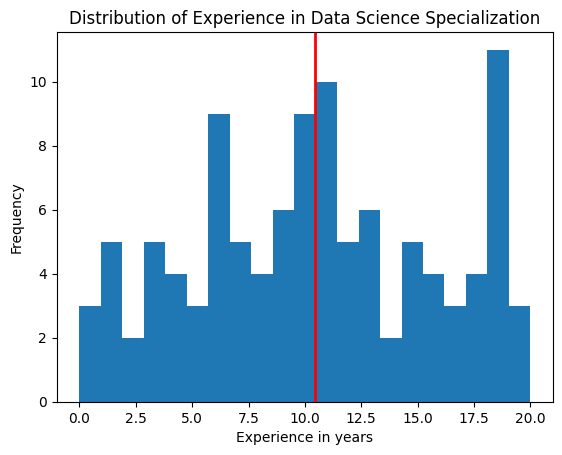

Mean Experience of DSS Batch : {:4.3f} 10.435185185185185
Std Deviation of Experience of DSS Batch : {:4.3f} 5.66547887575555


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# array containing no of total experience
dss_exp = np.array([12, 15, 13, 20, 19, 20, 11, 19, 11, 12, 19, 13, 
                    12, 10, 6, 19, 3, 1, 1, 0, 4, 4, 6, 5, 3, 7,
                    12, 7, 9, 8, 12, 11, 11, 18, 19, 18, 19, 3, 6, 
                    5, 6, 9, 11, 10, 14, 14, 16, 17, 17, 19, 0, 2,
                    0, 3, 1, 4, 6, 6, 8, 7, 7, 6, 7, 11, 11, 10,
                    11, 10, 13, 13, 15, 18, 20, 19, 1, 10, 8, 16,
                    19, 19, 17, 16, 11, 1, 10, 13, 15, 3, 8, 6, 9,
                    10, 15, 19, 2, 4, 5, 6, 9, 11, 10, 9, 10, 9,
                    15, 16, 18, 13])

plt.hist(dss_exp, range = (0, 20), bins = 21)

plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in Data Science Specialization")

plt.axvline(x=dss_exp.mean(), linewidth=2, color='r')
plt.show()

print("Mean Experience of DSS Batch : {:4.3f}", format(dss_exp.mean()))
print("Std Deviation of Experience of DSS Batch : {:4.3f}", format(dss_exp.std()))

In [9]:
# Set the parameters for sampling

n = 10
NUM_TRIALS = 1000

samp = np.random.choice(dss_exp, size=n, replace=True)
samp_mean = samp.mean()
samp_sd = samp.std()

print("Samp_mean = {:4.3f} Sample_SD = {:4.3f}".format(samp_mean, samp_sd))
print("Sample values: ", samp)


Samp_mean = 7.200 Sample_SD = 4.423
Sample values:  [ 7  3 11  4 15  6  5 14  1  6]


Mean = 10.455, Std Dev = 1.794, 5% Pct = 7.600, 95% Pct = 13.405


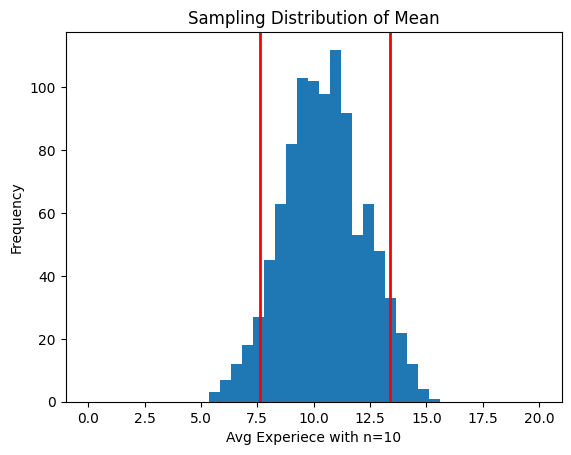

In [10]:
np.random.seed(100)
mn_array = np.zeros(NUM_TRIALS)
sd_array = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    samp = np.random.choice(dss_exp, size=n, replace=True)
    mn_array[i] = samp.mean()

mn = mn_array.mean()
sd = mn_array.std()
x5_pct = np.percentile(mn_array, 5.0)
x95_pct = np.percentile(mn_array, 95.0)

print("Mean = {:4.3f}, Std Dev = {:4.3f}, 5% Pct = {:4.3f}, 95% Pct = {:4.3f}".format(mn, sd, x5_pct, x95_pct))

plt.hist(mn_array, range=(0, 20), bins=41)
plt.xlabel("Avg Experiece with n={}".format(n))
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Mean")
plt.axvline(x=x5_pct, linewidth=2, color='r')
plt.axvline(x=x95_pct, linewidth=2, color='r')
plt.show()


In [11]:
def samp_mean_within_ci(mn, l_5pct, u_95pct) :
    out = True
    if (mn < l_5pct) | (mn > u_95pct) :
        out = False
    return out

In [12]:
# Estimation and Confidence Interval
samp = np.random.choice(dss_exp, size=n, replace=True)
samp_mean = samp.mean()
samp_sd = samp.std()

sd_ci = samp_sd/np.sqrt(n)

samp_lower_5pct = samp_mean - 1.645 * sd_ci

samp_upper_95pct = samp_mean + 1.645 * sd_ci
print("Pop mean: {:4.3f} | Sample: L_5PCT = {:4.3f} | M = {:4.3f} | H_95PCT = {:4.3f}".format(dss_exp.mean(), samp_lower_5pct, samp_mean, samp_upper_95pct))

mn_within_ci_flag = samp_mean_within_ci(dss_exp.mean(), samp_lower_5pct, samp_upper_95pct)
print("True mean lies with the 90% confidence Interval = {}".format(mn_within_ci_flag))

Pop mean: 10.435 | Sample: L_5PCT = 7.408 | M = 8.800 | H_95PCT = 10.192
True mean lies with the 90% confidence Interval = False


In [13]:
dss_exp_prev = np.array([
    1, 14, 6, 7, 10, 10, 19, 15, 19, 15,
    2, 2, 14, 14, 14, 3, 0, 4, 11, 7,
    1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
    4, 4, 4, 3, 3, 3, 3, 4, 3, 7,
    8, 6, 6, 6, 7, 8, 8, 8, 8, 7,
    8, 0, 0, 7, 6, 9, 10, 9, 9, 11,
    11, 9, 9, 10, 10, 11, 10, 11, 9, 9,
    12, 14, 13, 14, 18, 14, 11, 10, 17, 20,
    18, 5, 13, 4, 2, 4, 3, 12, 12, 14,
    12, 12, 10, 14, 4, 11, 9
])

Previous DSS Batch: Avg Exp = 8.052 Std Dev = 5.024


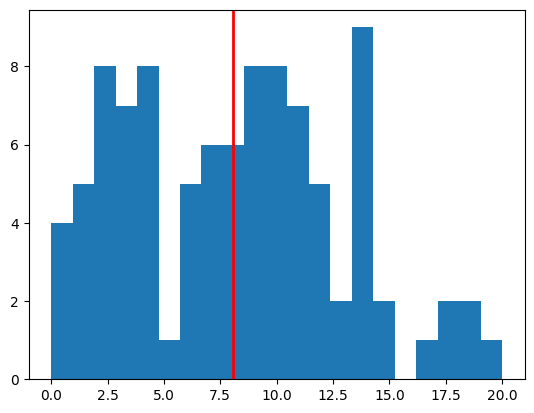

In [14]:
avg_exp_prev = dss_exp_prev.mean()
std_exp_prev = dss_exp_prev.std()
print("Previous DSS Batch: Avg Exp = {:4.3f} Std Dev = {:4.3f}".format(avg_exp_prev, std_exp_prev))

plt.hist(dss_exp_prev, range=(0, 20), bins=21)
plt.axvline(x=dss_exp_prev.mean(), linewidth=2, color='r')
plt.show()

In [15]:
np.random.seed(100)
n = 20

dss_mean = dss_exp.mean()
dss_sd = dss_exp.std()
print("Current DSS Batch: Population Mean - {:4.3f}".format(dss_mean))

dss_prev_samp = np.random.choice(dss_exp_prev, size=n, replace=True)
dss_prev_samp_mean = dss_prev_samp.mean()
print("Previous DSS Batch Sample Mean: {:4.3f}".format(dss_prev_samp_mean))

Current DSS Batch: Population Mean - 10.435
Previous DSS Batch Sample Mean: 8.300


In [16]:
from scipy import stats
t_statistic = (dss_prev_samp_mean - dss_mean) / (dss_sd/np.sqrt(n))
p_val = 2 * stats.t.cdf(t_statistic, df=(n-1))
print("T-Statistic : {:4.2f}, p-Value = {:4.2f}".format(t_statistic, p_val))

T-Statistic : -1.69, p-Value = 0.11


In [17]:
from scipy import stats

dss_exp_prev_samp = np.random.choice(dss_exp_prev, size=20, replace=True)
dss_exp_samp = np.random.choice(dss_exp, size=20, replace=True)
stats.ttest_ind(dss_exp_prev_samp, dss_exp_samp)

TtestResult(statistic=np.float64(-0.15493760125290224), pvalue=np.float64(0.8776905627909314), df=np.float64(38.0))